In [1]:
import os
import tensorflow.keras as keras
from tensorflow.keras.models import model_from_json
from tensorflow.keras import layers, models
import numpy as np
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [3]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
level1 (Conv2D)              (None, 100, 100, 32)      7808      
_________________________________________________________________
level2 (Conv2D)              (None, 100, 100, 32)      25632     
_________________________________________________________________
out (Conv2D)                 (None, 100, 100, 3)       867       
Total params: 34,307
Trainable params: 34,307
Non-trainable params: 0
_________________________________________________________________


In [4]:
from matplotlib import pyplot as plt
import cv2

test_image = cv2.imread("DIV2K_train_HR/DIV2K_train_HR/0250.png", cv2.IMREAD_COLOR)

In [5]:
def big_image_to_parts(img, hr_size, big_image_size):
    r_image = cv2.resize(img, (big_image_size, big_image_size))
    height, width, channel = r_image.shape
    CROP_H_SIZE = big_image_size // hr_size
    CROP_W_SIZE = big_image_size // hr_size
    images = []
    for ih in range(CROP_H_SIZE):
        for iw in range(CROP_W_SIZE):
            x = width // CROP_W_SIZE * iw
            y = height // CROP_H_SIZE * ih
            h = (height // CROP_H_SIZE)
            w = (width // CROP_W_SIZE)
            images.append(r_image[y:y + h, x:x + w])
    return images

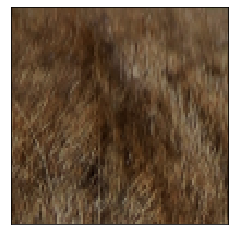

In [6]:

test_image_parts = big_image_to_parts(test_image, 100, 1000)
test_non_resized = test_image_parts[34]
b,g,r = cv2.split(test_non_resized)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


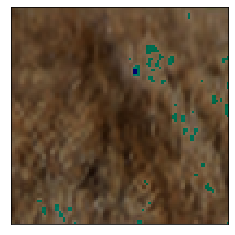

In [7]:
a_list = []
for image in test_image_parts:
    test1 = cv2.resize(image, (50, 50))
    test1 = cv2.resize(test1, (100, 100), interpolation=cv2.INTER_LINEAR)
    test1 = test1.astype('float32')
    test1 /= 255.0
    a_list.append(test1)
a_list = np.array(a_list)
a_list.shape
a = loaded_model.predict(a_list)
a *= 255.0
a = a.astype(np.int8)
b,g,r = cv2.split(a[34])       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.show()

In [8]:
made_image = np.zeros([1000,1000,3], dtype=np.uint8)
for i in range(10):
    for j in range(10):
        made_image[i * 100 : i * 100 + 100 , j * 100 : j * 100 + 100 ] = a [i*10 + j]
a.shape  

(100, 100, 100, 3)

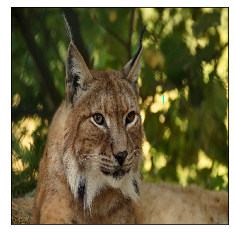

True

In [9]:
b,g,r = cv2.split(made_image)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.show()
cv2.imwrite("made.jpg", made_image)

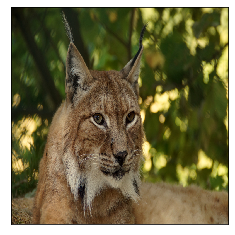

True

In [10]:
test_resized = cv2.resize(test_image, (1000,1000))
b,g,r = cv2.split(test_resized)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.show()
cv2.imwrite("test.jpg", test_resized)

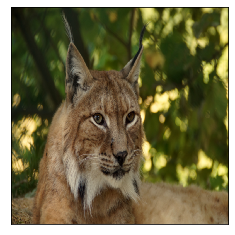

True

In [11]:
test_res = cv2.resize(test_resized, (500,500))
test_res = cv2.resize(test_res, (1000, 1000),  interpolation=cv2.INTER_LINEAR)
b,g,r = cv2.split(test_res)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.show()
cv2.imwrite("test_with_interp.jpg", test_res)